# NEURAL NETWORKS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# IMPORTING TRAINDATASET

In [3]:
train_df = pd.read_csv("train.csv")
data = np.array(train_df)
train_df

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,0,0.513725,0.470588,0.494118,0.486275,0.474510,0.486275,0.486275,0.482353,0.482353,...,0.054902,0.074510,0.168627,0.647059,0.690196,0.066667,0.180392,0.270588,0.239216,0.078431
1,0,0.235294,0.231373,0.243137,0.231373,0.231373,0.243137,0.227451,0.227451,0.231373,...,0.203922,0.223529,0.211765,0.203922,0.211765,0.215686,0.211765,0.207843,0.203922,0.207843
2,0,0.231373,0.223529,0.415686,0.403922,0.392157,0.403922,0.427451,0.411765,0.419608,...,0.309804,0.282353,0.294118,0.290196,0.278431,0.294118,0.286275,0.286275,0.290196,0.294118
3,0,0.525490,0.537255,0.545098,0.549020,0.549020,0.556863,0.560784,0.560784,0.564706,...,0.572549,0.572549,0.603922,0.349020,0.345098,0.482353,0.572549,0.580392,0.584314,0.580392
4,0,0.133333,0.239216,0.196078,0.243137,0.243137,0.227451,0.254902,0.254902,0.247059,...,0.294118,0.294118,0.290196,0.290196,0.286275,0.286275,0.286275,0.290196,0.290196,0.290196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,9,0.521569,0.541176,0.509804,0.580392,0.623529,0.564706,0.364706,0.768627,0.564706,...,0.156863,0.156863,0.152941,0.149020,0.152941,0.160784,0.145098,0.145098,0.152941,0.160784
7996,9,0.600000,0.580392,0.588235,0.584314,0.576471,0.588235,0.596078,0.596078,0.584314,...,0.207843,0.203922,0.203922,0.207843,0.219608,0.223529,0.215686,0.211765,0.227451,0.215686
7997,9,0.200000,0.239216,0.674510,0.572549,0.482353,0.666667,0.650980,0.443137,0.486275,...,0.356863,0.337255,0.356863,0.360784,0.352941,0.364706,0.396078,0.258824,0.200000,0.207843
7998,9,0.482353,0.482353,0.486275,0.478431,0.486275,0.482353,0.486275,0.454902,0.478431,...,0.352941,0.372549,0.356863,0.341176,0.352941,0.384314,0.333333,0.278431,0.403922,0.392157


In [4]:
np.random.shuffle(data)
m, n = data.shape
data_train = data.T
y_train = data_train[0].astype(int)
x_train = data_train[1:n]

# Defining Functions required to implement a Two Layer Neural Network

In [5]:

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    Z = Z.astype(float)
    exp = np.exp(Z - Z.max())
    return (exp / np.sum(exp, axis=0))

def cross_entropy_loss(A3,Y,W1,W2,W3,reg):
    loss = np.mean(-np.sum(np.log(A3[Y, np.arange(m)])))
    reg_loss = 0.5*reg*np.sum(W1*W1) + 0.5*reg*np.sum(W2*W2)+0.5*reg*np.sum(W3*W3)   
    return loss
    
def forward_prop(W1, b1, W2, b2,W3,b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
    
def backward_prop(Z1, A1, Z2, A2,Z3, A3, W1, W2,W3, X, Y,num,reg):
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / num * dZ3.dot(A2.T)
    db3 = 1 / num * np.sum(dZ3, axis=1, keepdims=True) 
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / num * dZ2.dot(A1.T)
    db2 = 1 / num * np.sum(dZ2, axis=1, keepdims=True) 
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / num * dZ1.dot(X.T)
    db1 = 1 / num  * np.sum(dZ1, axis=1, keepdims=True)
    dW1 += reg*W1
    dW2 += reg*W2
    dW3 += reg*W3
    
    return dW1, db1, dW2, db2,dW3,db3

def update_params(W1, b1, W2, b2,W3,b3, dW1, db1, dW2, db2,dW3,db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3
    b3 = b3 - alpha * db3
    return W1, b1, W2, b2,W3,b3

def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

# Running Gradient Descent on the Training Dataset

In [6]:
def gradient_descent(x, y, iterations, alpha,num):
    W1 = np.random.rand(100, 784) - 0.5 
    B1 = np.random.rand(100, 1) - 0.5
    W2 = np.random.rand(10, 100) - 0.5
    B2 = np.random.rand(10, 1) - 0.5
    W3 = np.random.rand(10, 10) - 0.5
    B3 = np.random.rand(10, 1) - 0.5
    reg = 0.001
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3= forward_prop(W1, B1, W2, B2,W3,B3, x)
        dW1, dB1, dW2, dB2, dW3,dB3= backward_prop(Z1, A1, Z2, A2,Z3,A3, W1,W2,W3, x, y,num,reg)
        W1, B1, W2, B2, W3, B3 = update_params(W1, B1, W2, B2,W3,B3, dW1, dB1, dW2, dB2,dW3,dB3, alpha)
        if i % 10000== 0:
            print("Iteration: ", i)
            loss = cross_entropy_loss(A3,y,W1,W2,W3,reg)
            accuracy = get_accuracy(get_predictions(A3),y)
            print (f"Accuracy: {accuracy}")
            print(f"Total Loss: {loss} ")
    return W1, B1, W2, B2, W3, B3

W1, B1, W2, B2, W3, B3 = gradient_descent(x_train,y_train, 100000, 0.01,n)

Iteration:  0
Accuracy: 0.097
Total Loss: 51272.713055987886 
Iteration:  10000
Accuracy: 0.28175
Total Loss: 14981.661095846674 
Iteration:  20000
Accuracy: 0.56325
Total Loss: 9045.975802055349 
Iteration:  30000
Accuracy: 0.545625
Total Loss: 10529.308677417554 
Iteration:  40000
Accuracy: 0.740375
Total Loss: 5810.887587234129 
Iteration:  50000
Accuracy: 0.92825
Total Loss: 2047.8063245691374 
Iteration:  60000
Accuracy: 0.92875
Total Loss: 2103.3018294316153 
Iteration:  70000
Accuracy: 0.774375
Total Loss: 5056.191149931961 
Iteration:  80000
Accuracy: 0.712125
Total Loss: 6902.534591462478 
Iteration:  90000
Accuracy: 0.797125
Total Loss: 4877.483823177501 


# Testing Neural Network on Test Dataset

In [12]:
data_test = pd.read_csv('test.csv')
data_test = np.array(data_test)
np.random.shuffle(data_test)
data_test = data_test.T
j, k = data_test.shape
Y_test = data_test[0]
X_test = data_test[1:k]


def predictions(X, W1, b1, W2, b2,W3,b3):
    Z1, A1, Z2, A2,Z3,A3 = forward_prop(W1, b1, W2, b2,W3,b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2,W3,b3):
    map = {
        0: 'bart simpson',
        1: 'charles montgomery_burns',
        2: 'homer simpson',
        3: 'krusty the clown',
        4: 'lisa simpson',
        5: 'marge simpson',
        6: 'milhouse van houten',
        7: 'moe szyslak',
        8: 'ned flanders',
        9: 'principal skinner'
    }
    
    current_image = X_test[:, index, None]
    prediction = predictions(X_test[:, index, None], W1, b1, W2, b2,W3,b3)
    label = Y_test[index]
    print("Prediction: ", map[prediction[0]])
    print("Label: ", map[label])
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image.astype(int))
    plt.show()


Prediction:  homer simpson
Label:  homer simpson


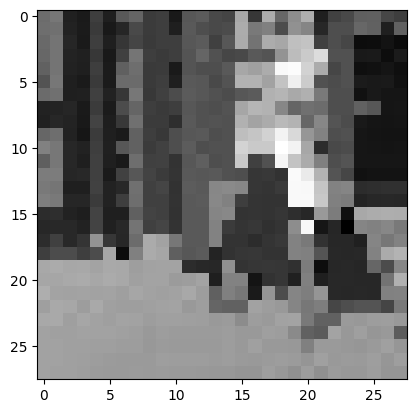

Prediction:  bart simpson
Label:  lisa simpson


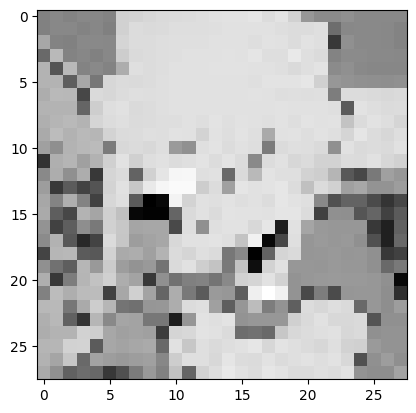

Prediction:  krusty the clown
Label:  milhouse van houten


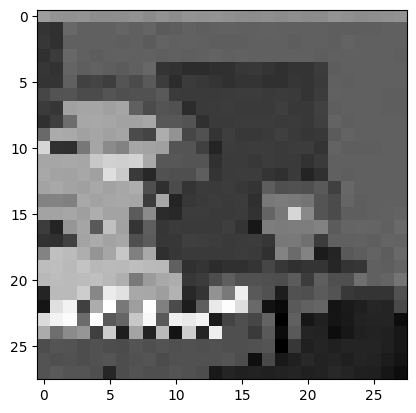

Prediction:  milhouse van houten
Label:  milhouse van houten


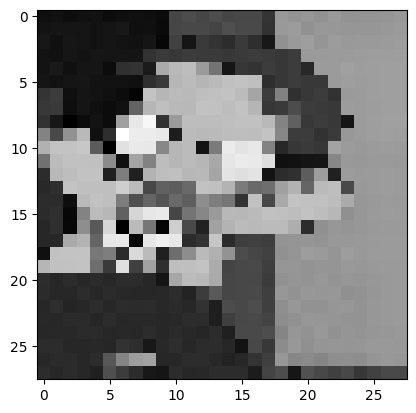

Accuracy for test Dataset:33.550000000000004%


In [15]:
test_prediction(50,W1, B1, W2, B2,W3,B3)
test_prediction(150, W1, B1, W2, B2,W3,B3)
test_prediction(250, W1, B1, W2, B2,W3,B3)
test_prediction(350, W1, B1, W2, B2,W3,B3)

test_accuracy = get_accuracy(predictions(X_test,W1,B1,W2,B2,W3,B3),Y_test)

print (f"Accuracy for test Dataset:{test_accuracy*100}%")